# Data Manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('./task2_data_raw.csv') 

In [3]:
#Column types to numeric
df=df.apply(pd.to_numeric, errors='ignore')
df.dtypes

url              object
title            object
price             int64
sqm_living        int64
room            float64
bedrooms        float64
baths             int64
toilets           int64
balcony           int64
park_space        int64
parkm             int64
garage            int64
loggia            int64
terrace           int64
yr_built        float64
sqm_lot         float64
sqm_garten      float64
sqm_terrace     float64
sqm_cellar      float64
garten            int64
lift              int64
erstbezug         int64
new_bld           int64
old_bld           int64
kitchen           int64
alarm             int64
tags             object
beschreibung     object
dtype: object

In [4]:
#Checking tags info
#dummies=pd.get_dummies(df['tags'].apply(pd.Series).stack()).sum(level=0)
#dummies.columns

In [5]:
#Saving tags info, there might be significant features for the models
#dummies.to_csv("./task2_data_tags.csv")

In [6]:
df.columns

Index(['url', 'title', 'price', 'sqm_living', 'room', 'bedrooms', 'baths',
       'toilets', 'balcony', 'park_space', 'parkm', 'garage', 'loggia',
       'terrace', 'yr_built', 'sqm_lot', 'sqm_garten', 'sqm_terrace',
       'sqm_cellar', 'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld',
       'kitchen', 'alarm', 'tags', 'beschreibung'],
      dtype='object')

In [7]:
#Missing Values
df.isnull().sum()

url                0
title              0
price              0
sqm_living         0
room              73
bedrooms        2085
baths              0
toilets            0
balcony            0
park_space         0
parkm              0
garage             0
loggia             0
terrace            0
yr_built         732
sqm_lot            2
sqm_garten      2050
sqm_terrace     2329
sqm_cellar      1674
garten             0
lift               0
erstbezug          0
new_bld            0
old_bld            0
kitchen            0
alarm              0
tags               0
beschreibung       0
dtype: int64

In [8]:
#Drop columns with nulls
df.drop(['bedrooms','sqm_garten','sqm_terrace','sqm_cellar'], axis=1, inplace=True)

In [9]:
df["len_explanation"] = df.beschreibung.str.len()

In [10]:
#Create Building Age
df['building_age'] = df['yr_built'].apply(lambda x: 2021-x)

In [11]:
df.drop("yr_built", axis=1, inplace=True)

In [12]:
df.columns

Index(['url', 'title', 'price', 'sqm_living', 'room', 'baths', 'toilets',
       'balcony', 'park_space', 'parkm', 'garage', 'loggia', 'terrace',
       'sqm_lot', 'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld',
       'kitchen', 'alarm', 'tags', 'beschreibung', 'len_explanation',
       'building_age'],
      dtype='object')

In [13]:
df=df.iloc[:, np.r_[2:21, 23:25]]
df.columns

Index(['price', 'sqm_living', 'room', 'baths', 'toilets', 'balcony',
       'park_space', 'parkm', 'garage', 'loggia', 'terrace', 'sqm_lot',
       'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld', 'kitchen', 'alarm',
       'len_explanation', 'building_age'],
      dtype='object')

In [14]:
df.to_csv("./task2_data_processed.csv")

In [15]:
len(df)

2329

In [16]:
df.isnull().sum()

price                0
sqm_living           0
room                73
baths                0
toilets              0
balcony              0
park_space           0
parkm                0
garage               0
loggia               0
terrace              0
sqm_lot              2
garten               0
lift                 0
erstbezug            0
new_bld              0
old_bld              0
kitchen              0
alarm                0
len_explanation      0
building_age       732
dtype: int64

In [17]:
#Drop missing values
df2 = df.dropna(how='any',axis=0) 

In [18]:
print(len(df2))
df2.columns

1559


Index(['price', 'sqm_living', 'room', 'baths', 'toilets', 'balcony',
       'park_space', 'parkm', 'garage', 'loggia', 'terrace', 'sqm_lot',
       'garten', 'lift', 'erstbezug', 'new_bld', 'old_bld', 'kitchen', 'alarm',
       'len_explanation', 'building_age'],
      dtype='object')

In [19]:
df2.building_age.describe()

count    1559.000000
mean       29.304682
std        71.454171
min        -2.000000
25%         0.000000
50%         1.000000
75%        48.000000
max      2021.000000
Name: building_age, dtype: float64

In [20]:
df2.building_age.quantile(0.85)

67.29999999999995

In [21]:
df2=df2[df2.building_age < 68 ]

<AxesSubplot:xlabel='building_age'>

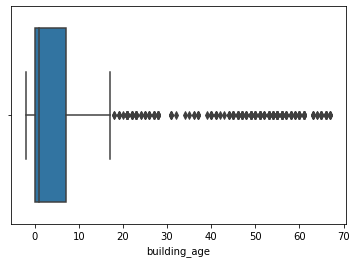

In [22]:
sns.boxplot(x=df2.building_age)

In [23]:
#Clean zipcode
#cols = ['zipcode']
#df[cols] = df[df[cols] > 1000][cols]
#len(df)

In [24]:
#df.zipcode = df.zipcode.astype(str)

# Explatory Data Analysis

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

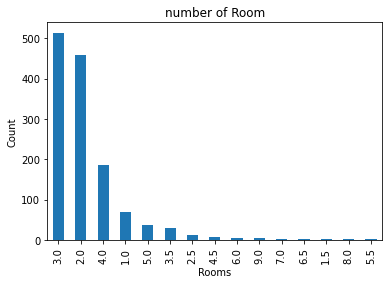

In [25]:
#Frequency of number of room in flats
df2['room'].value_counts().plot(kind='bar')
plt.title('number of Room')
plt.xlabel('Rooms')
plt.ylabel('Count')
sns.despine

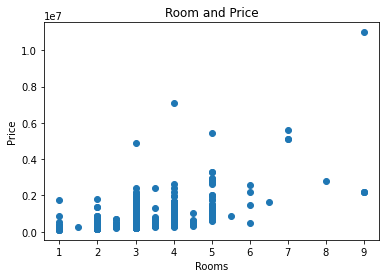

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [26]:
plt.scatter(df2.room,df2.price)
plt.title("Room and Price")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Square Meter')

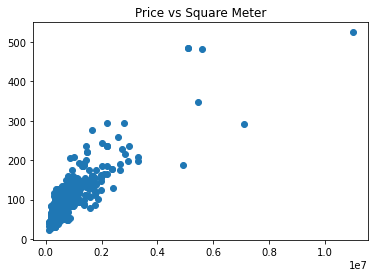

In [27]:
plt.scatter(df2.price,df2.sqm_living)
plt.title("Price vs Square Meter")

In [28]:
#plt.scatter(df.zipcode,df.price)
#plt.title("Expensive location by zipcode")

In [29]:
#Check Outliers

In [30]:
df2.describe()

,price,sqm_living,room,baths,toilets,balcony,park_space,parkm,garage,loggia,...,sqm_lot,garten,lift,erstbezug,new_bld,old_bld,kitchen,alarm,len_explanation,building_age
count,1.325000e+03,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,...,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,5.555383e+05,79.179623,2.804528,1.163019,1.230189,0.441509,0.204528,0.578113,2.812075,0.344151,...,79.174377,0.187170,0.833208,0.576604,0.828679,0.020377,0.156226,0.024151,3539.524528,10.675472
std,6.114517e+05,44.169760,0.994840,0.442108,0.555658,0.496755,1.952915,0.577240,20.463663,0.475270,...,44.166873,0.390195,0.372931,0.494284,0.376931,0.141341,0.363207,0.153576,2122.565948,19.507192
min,1.045250e+05,23.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261.000000,-2.000000
25%,2.876400e+05,51.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1993.000000,0.000000
50%,3.790000e+05,70.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,70.090000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3135.000000,1.000000
75%,5.853420e+05,93.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,93.190000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4144.000000,7.000000
max,1.099000e+07,525.000000,9.000000,5.000000,6.000000,1.000000,42.000000,5.000000,168.000000,1.000000,...,524.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11841.000000,67.000000


<AxesSubplot:xlabel='price'>

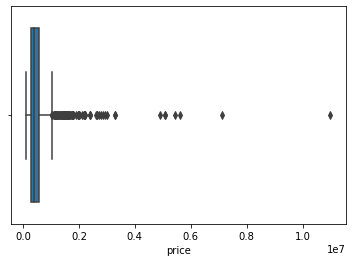

In [31]:
#Price box-plot
sns.boxplot(x=df2.price)

In [32]:
#Upper outer fence
outlier_limit=df2.price.quantile(0.75) + 3*((df2.price.quantile(0.75))-(df2.price.quantile(0.25)))
outlier_limit

1478448.0

In [33]:
price_outlier_conditional = df2.price < outlier_limit
df2_without_outliers = df2[price_outlier_conditional]

<AxesSubplot:xlabel='price'>

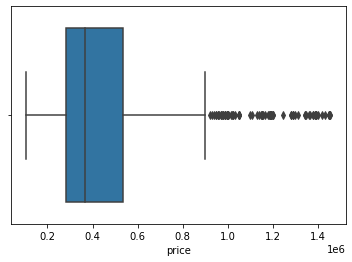

In [34]:
sns.boxplot(x=df2_without_outliers.price)

In [35]:
df2_without_outliers.describe()

,price,sqm_living,room,baths,toilets,balcony,park_space,parkm,garage,loggia,...,sqm_lot,garten,lift,erstbezug,new_bld,old_bld,kitchen,alarm,len_explanation,building_age
count,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,...,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,4.548599e+05,73.069952,2.717011,1.110493,1.170906,0.446741,0.207472,0.562003,1.865660,0.350556,...,73.063983,0.190779,0.829889,0.573927,0.844992,0.012719,0.156598,0.015103,3586.183625,10.794913
std,2.581239e+05,29.340698,0.859574,0.330908,0.437188,0.497353,2.001759,0.555341,16.317121,0.477334,...,29.337352,0.393071,0.375880,0.494701,0.362056,0.112102,0.363566,0.122013,2140.120737,19.730344
min,1.045250e+05,23.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261.000000,-2.000000
25%,2.804450e+05,50.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2034.000000,0.000000
50%,3.650000e+05,68.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,68.115000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3147.500000,1.000000
75%,5.342138e+05,88.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,87.700000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4144.000000,6.000000
max,1.455000e+06,235.000000,6.000000,3.000000,4.000000,1.000000,42.000000,4.000000,168.000000,1.000000,...,235.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11841.000000,67.000000


In [36]:
len(df2_without_outliers)

1258

In [37]:
from scipy.stats import norm, skew

C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


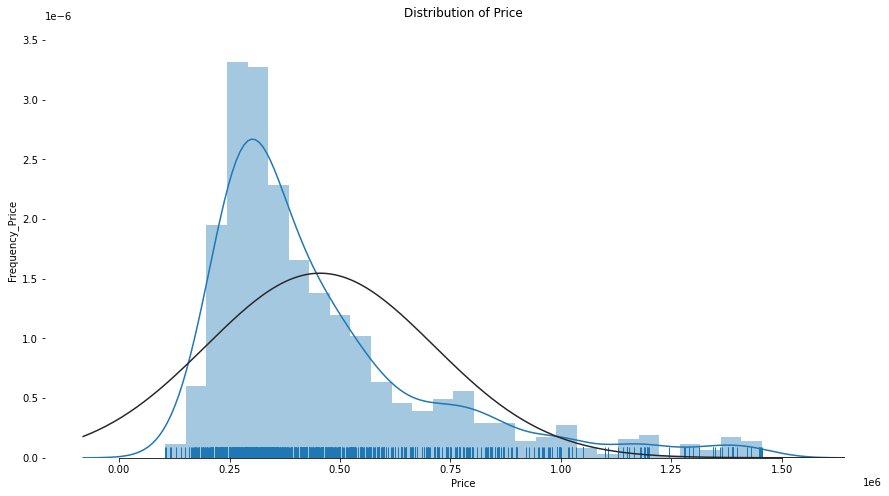

In [38]:
f, ax = plt.subplots(figsize =(15,8))
sns.distplot(df2_without_outliers['price'], rug = True, fit = norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency_Price")
ax.set(xlabel="Price")
ax.set(title="Distribution of Price")
sns.despine(trim=True, left=True)
plt.show();

In [39]:
print('Skew of Price:',df2_without_outliers['price'].skew())

Skew of Price: 1.7193820283394916


C:\Users\NESLIH~1.KES\AppData\Local\Temp/ipykernel_2488/3803270778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_without_outliers['log_price']=np.log(df2_without_outliers['price']+1)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x

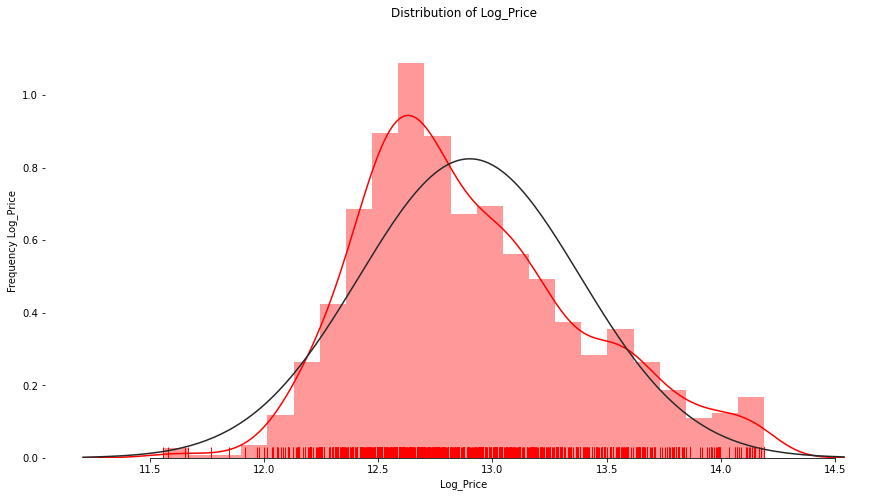

Skew of Log Price: 0.5703518044366847


In [40]:
df2_without_outliers['log_price']=np.log(df2_without_outliers['price']+1)
f, ax = plt.subplots(figsize =(15,8))
sns.distplot(df2_without_outliers['log_price'], color="red", rug = True, fit = norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency Log_Price")
ax.set(xlabel="Log_Price")
ax.set(title="Distribution of Log_Price")
sns.despine(trim=True, left=True)
plt.show();
print('Skew of Log Price:',df2_without_outliers['log_price'].skew())

In [41]:
df2_without_outliers['log_sqm_living']=np.log(df2_without_outliers['sqm_living']+1)
df2_without_outliers['log_sqm_lot']=np.log(df2_without_outliers['sqm_lot']+1)
df2_without_outliers['log_len_explanation']=np.log(df2_without_outliers['len_explanation']+1)

C:\Users\NESLIH~1.KES\AppData\Local\Temp/ipykernel_2488/4151728564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_without_outliers['log_sqm_living']=np.log(df2_without_outliers['sqm_living']+1)
C:\Users\NESLIH~1.KES\AppData\Local\Temp/ipykernel_2488/4151728564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_without_outliers['log_sqm_lot']=np.log(df2_without_outliers['sqm_lot']+1)
C:\Users\NESLIH~1.KES\AppData\Local\Temp/ipykernel_2488/4151728564.py:3: SettingWithCopyWarning: 
A value is try

Log_price became the output value (dependent variable) instead of price!

In [42]:
first_column = df2_without_outliers.pop('log_price')
df2_without_outliers.insert(0, 'log_price', first_column)

In [43]:
df2_without_outliers.drop(['price','sqm_living', 'sqm_lot', 'len_explanation'],axis=1 , inplace=True)

C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Feature Selection

In [44]:
#Feature selection
#Filter Method > Pearson Correlation > Correlation with target
#Wrapper Methods > Forward / Backward Elimination /RFE
#Embedded Methods > Lasso / Random Forest importance
#Discuss feature selection methods available in Sci-Kit (sklearn.feature_selection), 
#including cross-validated Recursive Feature Elimination (RFECV) and Univariate Feature Selection (SelectBest);

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Discuss methods that can inherently be used to select regressors, such as Lasso and 
#Decision Trees - Embedded Models (SelectFromModel); 

## 1. Filter Methods

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.1 Correlations

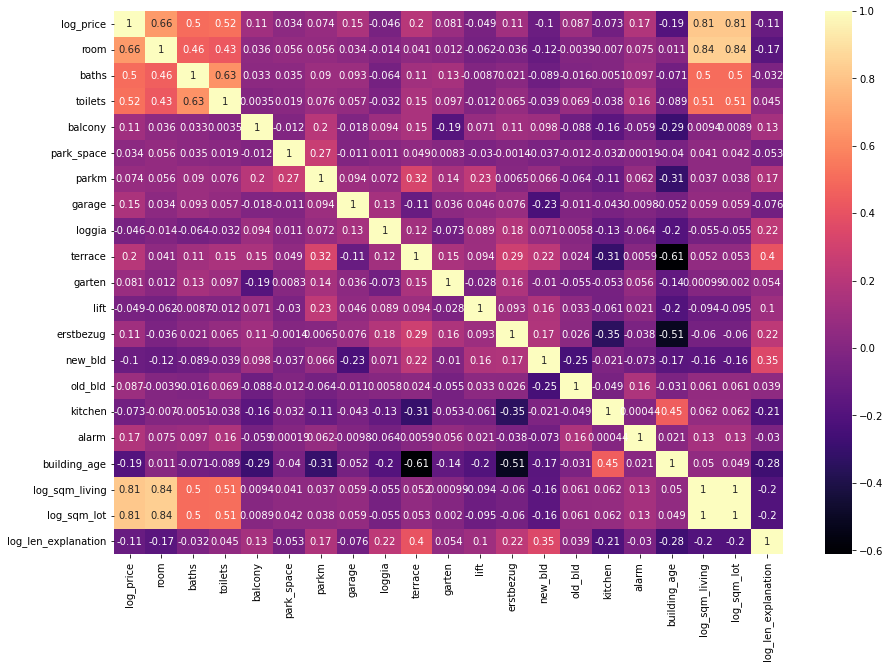

In [46]:
#Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df2_without_outliers.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [47]:
#Correlation with output variable
cor = df2_without_outliers.corr()
cor_target = abs(cor["log_price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
relevant_features.sort_values(ascending=False)
#df["price"] = x.target

log_price              1.000000
log_sqm_lot            0.814741
log_sqm_living         0.814692
room                   0.657118
toilets                0.521164
baths                  0.503582
terrace                0.198943
building_age           0.192267
alarm                  0.168597
garage                 0.152307
log_len_explanation    0.110175
erstbezug              0.108394
balcony                0.105912
new_bld                0.101256
Name: log_price, dtype: float64

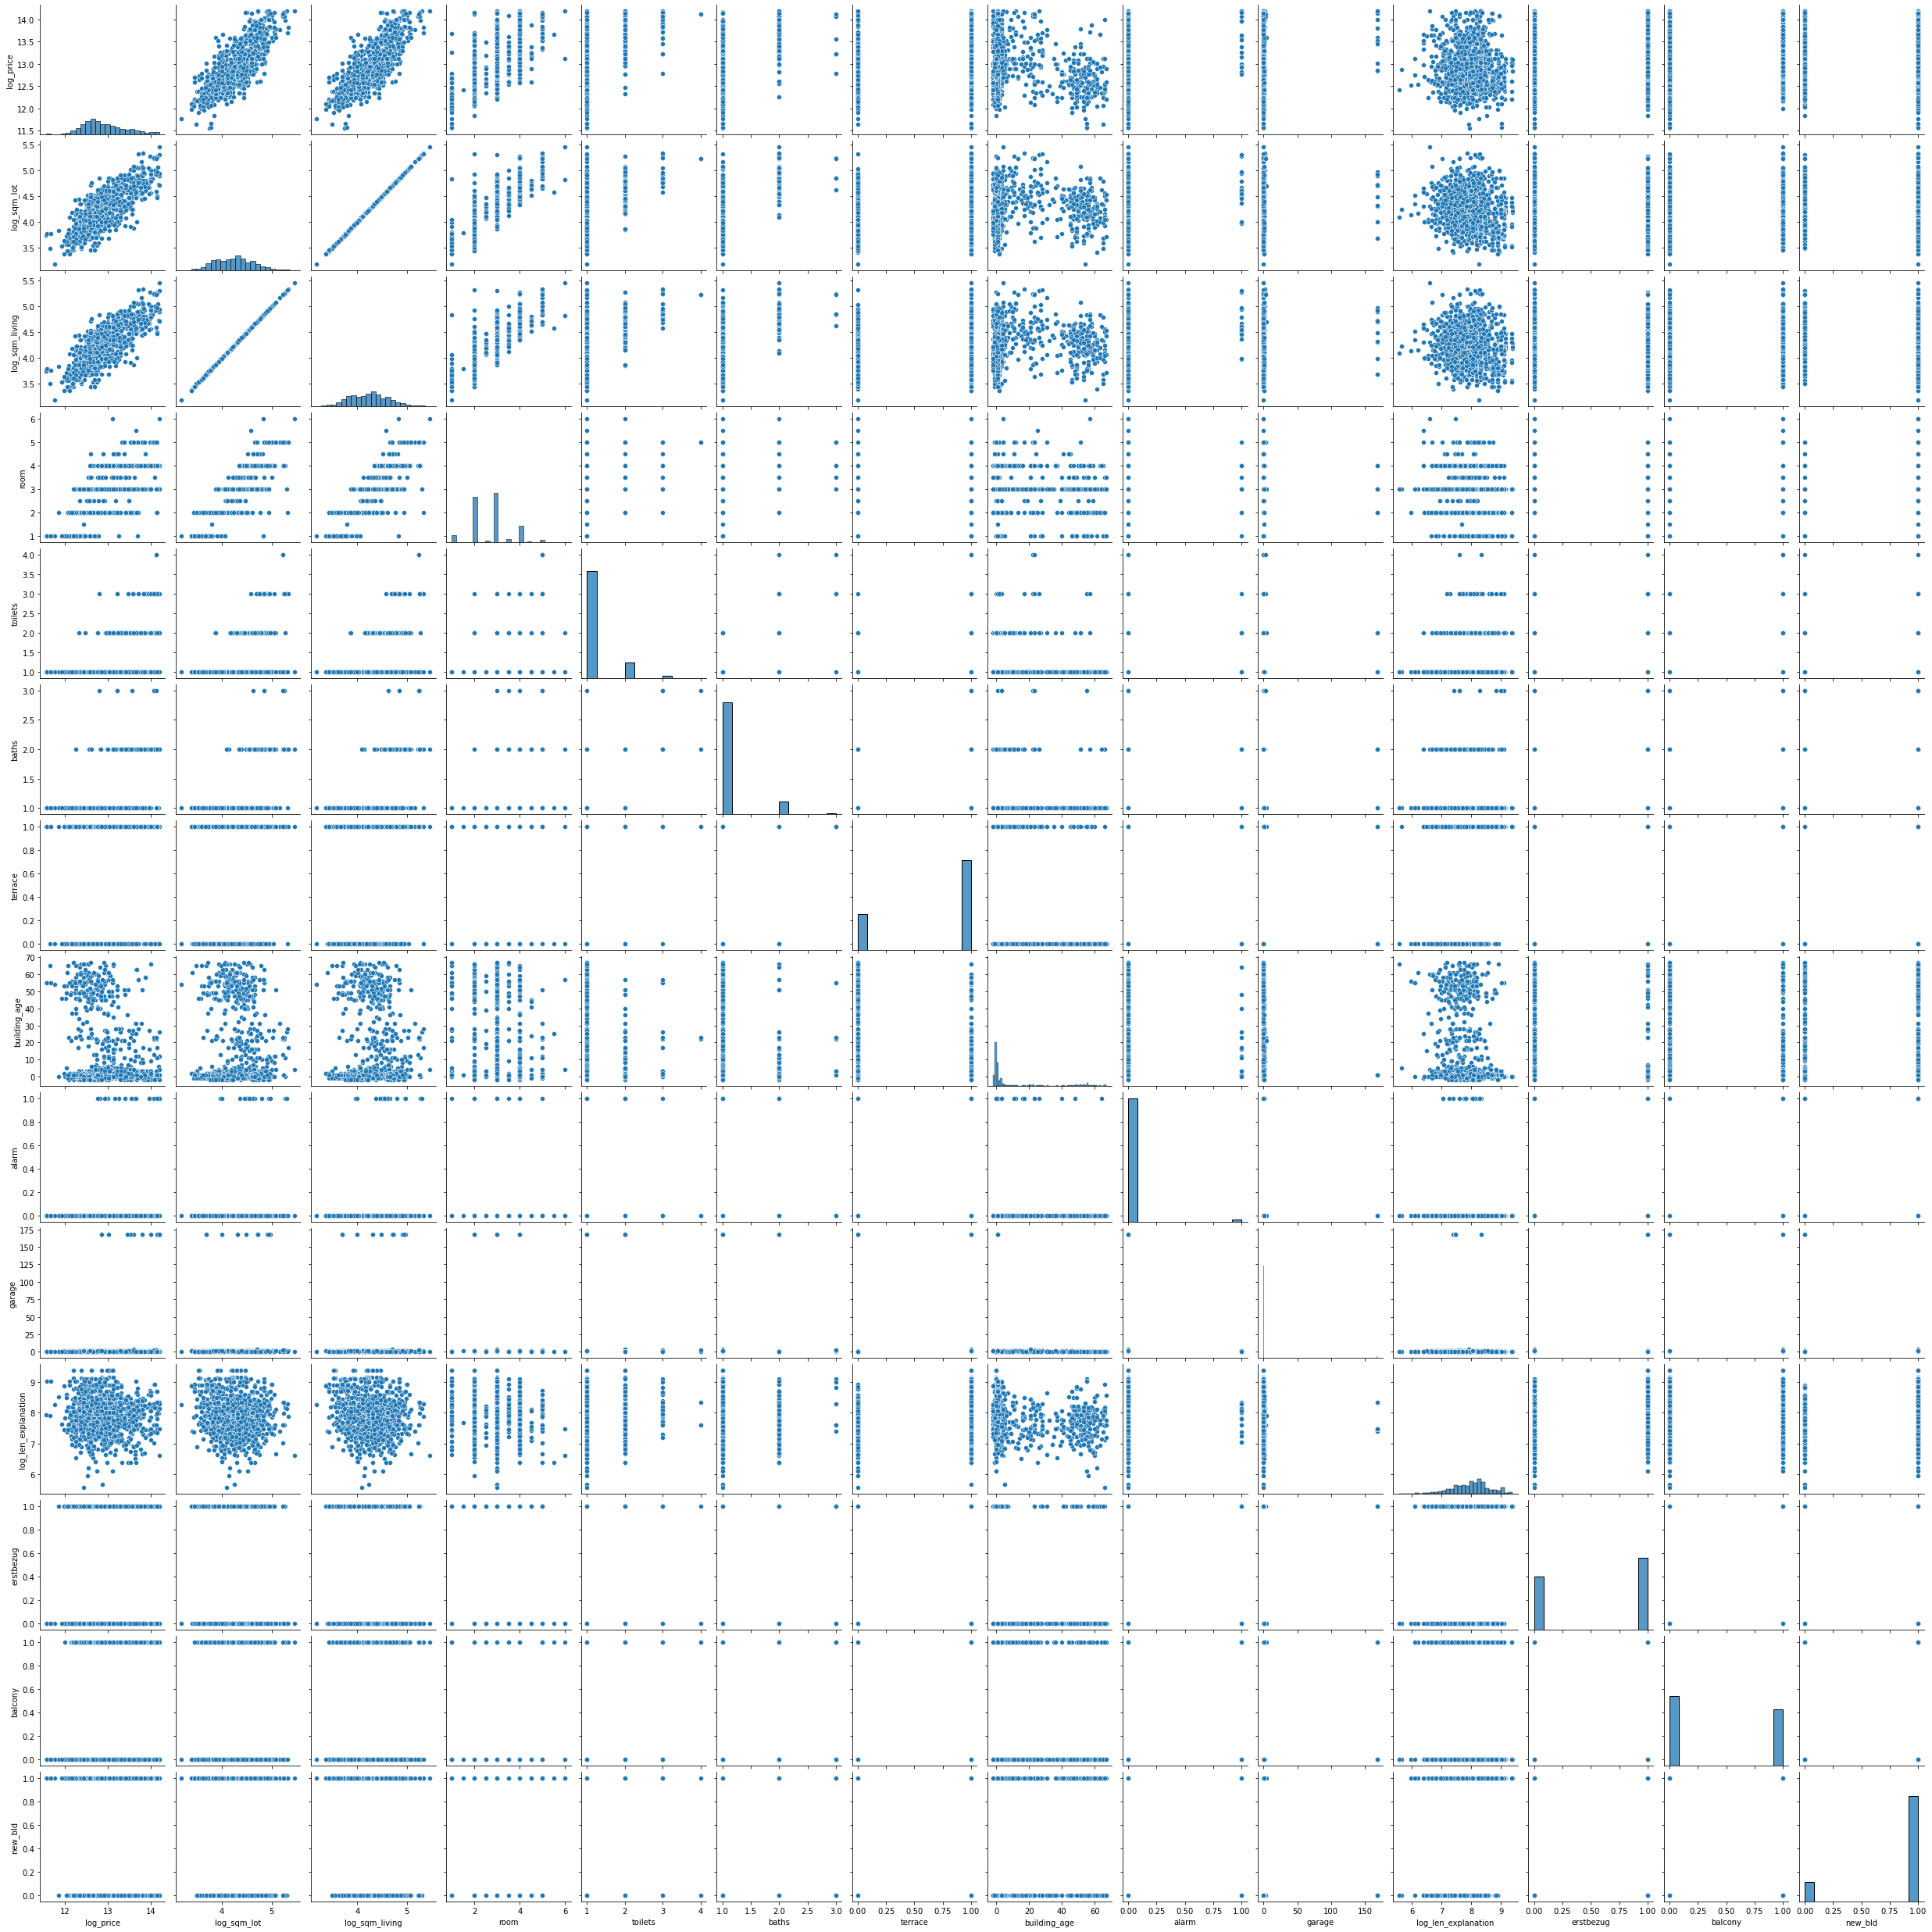

In [48]:
sns.pairplot(df2_without_outliers[['log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace','building_age',
                                   'alarm','garage','log_len_explanation','erstbezug', 'balcony','new_bld']])

Above correlation matrices indicates our output variable log_price is most corelated with these features; 
'log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace','building_age', 'alarm','garage','log_len_explanation','erstbezug', 'balcony','new_bld'

However, Multicollinearity must be considered in feature selection step.

In [49]:
df2_without_outliers=df2_without_outliers[['log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace','building_age',
                                   'alarm','garage','log_len_explanation','erstbezug', 'balcony','new_bld']]

###  1.2. Multicollinearity 

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be detected via VIF (Variable Inflation Factors). VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. 

In [50]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
X=df2_without_outliers.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,log_sqm_lot,899324.124520
1,log_sqm_living,898444.083773
2,room,29.292863
3,toilets,14.875667
4,baths,22.549756
5,terrace,6.491322
6,building_age,2.870698
7,alarm,1.055602
8,garage,1.126733
9,log_len_explanation,128.617332


In [52]:
df2_without_outliers_v1 = df2_without_outliers.copy()
df2_without_outliers_v1['baths_at_joining'] = df2_without_outliers_v1.apply(lambda x: x['baths'] - x['toilets'],axis=1)
X = df2_without_outliers_v1.drop(['log_sqm_lot','baths','log_price','log_len_explanation'],axis=1)
calc_vif(X)

,variables,VIF
0,log_sqm_living,52.428173
1,room,20.737188
2,toilets,21.050914
3,terrace,6.088468
4,building_age,2.849472
5,alarm,1.052551
6,garage,1.124333
7,erstbezug,3.241121
8,balcony,1.999678
9,new_bld,7.081913


In [53]:
df2_without_outliers_v1['log_sqm_living_at_joining'] = df2_without_outliers_v1.apply(lambda x: x['log_sqm_living'] - x['room'],axis=1)
X = df2_without_outliers_v1.drop(['log_sqm_lot','baths','log_price','log_len_explanation', 'log_sqm_living'],axis=1)
calc_vif(X)

,variables,VIF
0,room,17.434137
1,toilets,21.050914
2,terrace,6.088468
3,building_age,2.849472
4,alarm,1.052551
5,garage,1.124333
6,erstbezug,3.241121
7,balcony,1.999678
8,new_bld,7.081913
9,baths_at_joining,2.028527


In [54]:
#Feature Selection Method : Correlation
y_11 = df2_without_outliers_v1["log_price"]
X_11=df2_without_outliers_v1[['room', 'toilets', 'terrace', 'building_age', 'alarm', 'garage', 'erstbezug', 
                              'balcony', 'new_bld', 'baths_at_joining', 'log_sqm_living_at_joining']]

## 2. Wrapper Methods 

In [55]:
df2_without_outliers_v2 = df2_without_outliers.copy()
df2_without_outliers_v2.columns

Index(['log_price', 'log_sqm_lot', 'log_sqm_living', 'room', 'toilets',
       'baths', 'terrace', 'building_age', 'alarm', 'garage',
       'log_len_explanation', 'erstbezug', 'balcony', 'new_bld'],
      dtype='object')

### 2.1 Backward Elimination 

In [56]:
#Wrapper Methods
import statsmodels.api as sm

X = df2_without_outliers_v2.drop("log_price",1)   #Feature Matrix
y = df2_without_outliers_v2["log_price"]  #Target Variable

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['log_sqm_lot', 'room', 'toilets', 'baths', 'terrace', 'building_age', 'alarm', 'garage', 'log_len_explanation', 'erstbezug', 'balcony']


C:\Users\NESLIH~1.KES\AppData\Local\Temp/ipykernel_2488/2994785851.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2_without_outliers_v2.drop("log_price",1)   #Feature Matrix
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nesli

In [57]:
#Feature Selection Method : Backward Elimination
y_21 = df2_without_outliers_v2["log_price"]
X_21=df2_without_outliers_v2[['log_sqm_lot', 'room', 'toilets', 'baths', 'terrace', 'building_age',
                              'alarm', 'garage', 'log_len_explanation', 'erstbezug', 'balcony']]

### 2.2 RFE 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True  True False  True False False  True  True
 False]
[2 1 3 1 1 1 5 1 7 4 1 1 6]


C:\Users\neslihan.keskin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [59]:
X.columns

Index(['log_sqm_lot', 'log_sqm_living', 'room', 'toilets', 'baths', 'terrace',
       'building_age', 'alarm', 'garage', 'log_len_explanation', 'erstbezug',
       'balcony', 'new_bld'],
      dtype='object')

In [60]:
#Feature Selection Method : RFE
y_22 = df2_without_outliers_v2["log_price"]
X_22=df2_without_outliers_v2[['log_sqm_living', 'toilets', 'baths', 'terrace', 'alarm', 'erstbezug', 'balcony']]

# Machine Learning Algorithms

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from termcolor import colored as cl
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2

## 1. Features selected by correlations

In [64]:
##Feature Selection Method : Correlation
X=X_11
y=y_11

In [65]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =1)

In [66]:
model_lreg = LinearRegression()
model_lreg.fit(x_train,y_train)
lr_yhat=model_lreg.predict(x_test)
mae=mean_absolute_error(y_test,lr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, lr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_lreg.score(x_test,y_test))

MAE: 0.190
MAE: 0.057


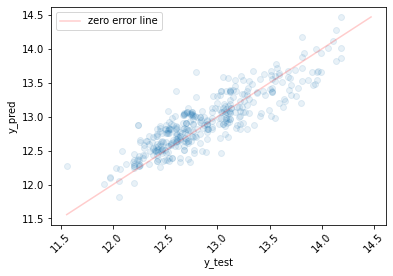

In [67]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lr_yhat,alpha=0.1)
plt.plot(
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
         c="red",
         alpha=0.2,label="zero error line")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xticks(rotation=45)
plt.legend()
plt.style.use("default")
plt.show()

In [68]:
#GradientBoosting Regressor
model_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
model_gbr.fit(x_train, y_train)
gbr_yhat=model_gbr.predict(x_test)
mae=mean_absolute_error(y_test,gbr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, gbr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_gbr.score(x_test,y_test))

MAE: 0.159
MAE: 0.052


In [69]:
#XGBoost Regressor
model_xgb = xgb.XGBRegressor (learning_rate=0.1,
                       n_estimators=400,
                       max_depth=6,
                       min_child_weight=1.5,
                       gamma=0.0,
                       subsample=0.2,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       random_state=42) 
model_xgb.fit(x_train, y_train)
xgb_yhat=model_xgb.predict(x_test)
mae=mean_absolute_error(y_test,xgb_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, xgb_yhat)
print('MSE: %.3f' % mse)
#print('Score:  %.3f' % model_xgb.score(x_test,y_test))

MAE: 0.166
MSE: 0.049


In [70]:
# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of LR model is {}'.format(r2(y_test, lr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, gbr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of XGBoosting model is {}'.format(r2(y_test, xgb_yhat)), attrs = ['bold']))

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of of LR model is 0.755537708806826
-------------------------------------------------------------------------------
R-Squared of Gradient Boosting model is 0.7763311514658107
-------------------------------------------------------------------------------
R-Squared of of XGBoosting model is 0.7889782266038494


## 2. Features selected by Backward Elimination

In [71]:
##Feature Selection Method : Backward Elimination
X=X_21
y=y_21

In [72]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =1)

In [73]:
model_lreg = LinearRegression()
model_lreg.fit(x_train,y_train)
lr_yhat=model_lreg.predict(x_test)
mae=mean_absolute_error(y_test,lr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, lr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_lreg.score(x_test,y_test))

MAE: 0.190
MAE: 0.057


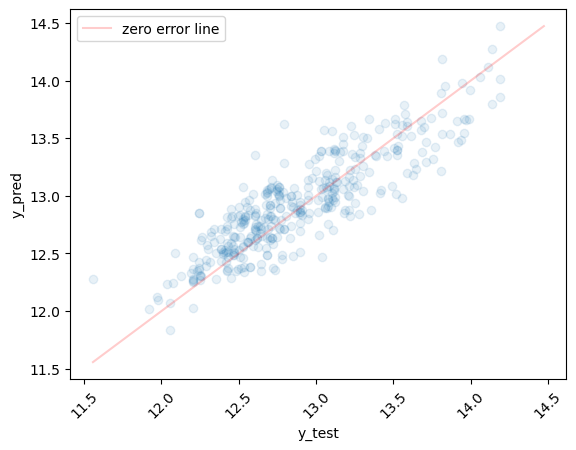

In [74]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lr_yhat,alpha=0.1)
plt.plot(
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
         c="red",
         alpha=0.2,label="zero error line")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xticks(rotation=45)
plt.legend()
plt.style.use("default")
plt.show()

In [75]:
#GradientBoosting Regressor
model_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
model_gbr.fit(x_train, y_train)
gbr_yhat=model_gbr.predict(x_test)
mae=mean_absolute_error(y_test,gbr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, gbr_yhat)
print('MAE: %.3f' % mse)
#print('Score:  %.3f' % model_gbr.score(x_test,y_test))

MAE: 0.149
MAE: 0.044


In [76]:
#XGBoost Regressor
model_xgb = xgb.XGBRegressor (learning_rate=0.1,
                       n_estimators=400,
                       max_depth=6,
                       min_child_weight=1.5,
                       gamma=0.0,
                       subsample=0.2,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       random_state=42) 
model_xgb.fit(x_train, y_train)
xgb_yhat=model_xgb.predict(x_test)
mae=mean_absolute_error(y_test,xgb_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, xgb_yhat)
print('MSE: %.3f' % mse)
#print('Score:  %.3f' % model_xgb.score(x_test,y_test))

MAE: 0.154
MSE: 0.044


In [77]:
# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of LR model is {}'.format(r2(y_test, lr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, gbr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of XGBoosting model is {}'.format(r2(y_test, xgb_yhat)), attrs = ['bold']))

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of of LR model is 0.7570503435616955
-------------------------------------------------------------------------------
R-Squared of Gradient Boosting model is 0.812640726424746
-------------------------------------------------------------------------------
R-Squared of of XGBoosting model is 0.8140030649417538


## 3. Features selected by RFE

In [78]:
##Feature Selection Method : RFE
X=X_22
y=y_22

In [79]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.30,random_state =1)

In [80]:
model_lreg = LinearRegression()
model_lreg.fit(x_train,y_train)
yhat=model_lreg.predict(x_test)
mae=mean_absolute_error(y_test,yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, yhat)
print('MAE: %.3f' % mse)
print('Score:  %.3f' % model_lreg.score(x_test,y_test))

MAE: 0.201
MAE: 0.064
Score:  0.729


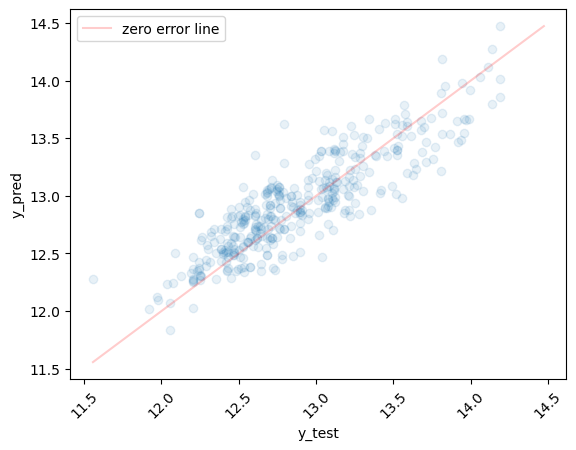

In [81]:
import matplotlib.pyplot as plt
plt.scatter(y_test,lr_yhat,alpha=0.1)
plt.plot(
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
    [min(min(y_test),min(lr_yhat)),max(max(y_test),max(lr_yhat))],
         c="red",
         alpha=0.2,label="zero error line")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xticks(rotation=45)
plt.legend()
plt.style.use("default")
plt.show()

In [82]:
#GradientBoosting Regressor
model_gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
model_gbr.fit(x_train, y_train)
gbr_yhat=model_gbr.predict(x_test)
mae=mean_absolute_error(y_test,gbr_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, gbr_yhat)
print('MAE: %.3f' % mse)
print('Score:  %.3f' % model_gbr.score(x_test,y_test))

MAE: 0.203
MAE: 0.074
Score:  0.683


In [83]:
#XGBoost Regressor
model_xgb = xgb.XGBRegressor (learning_rate=0.1,
                       n_estimators=400,
                       max_depth=5,
                       min_child_weight=1.5,
                       gamma=0.0,
                       subsample=0.2,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       random_state=42) 
model_xgb.fit(x_train, y_train)
xgb_yhat=model_xgb.predict(x_test)
mae=mean_absolute_error(y_test,xgb_yhat)
print('MAE: %.3f' % mae)
mse=mean_squared_error(y_test, xgb_yhat)
print('MSE: %.3f' % mse)
#print('Score:  %.3f' % model_xgb.score(x_test,y_test))

MAE: 0.189
MSE: 0.058


In [84]:
# R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of LR model is {}'.format(r2(y_test, lr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, gbr_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of of XGBoosting model is {}'.format(r2(y_test, xgb_yhat)), attrs = ['bold']))

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of of LR model is 0.7570503435616955
-------------------------------------------------------------------------------
R-Squared of Gradient Boosting model is 0.6825105101103142
-------------------------------------------------------------------------------
R-Squared of of XGBoosting model is 0.7523758233901995


The Best Model is Gradient Boost with the r-square value of 0.82, whose features were selected according to the backward elimination method. The features are log_sqm_lot', 'room', 'toilets', 'baths', 'terrace', 'building_age', 'alarm', 'garage', 'log_len_explanation', 'erstbezug' and 'balcony'.